## Definición de DBSCAN:

El algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un método de agrupamiento de datos que se basa en la densidad de los puntos en el espacio de características. A continuación, se describen los pasos del algoritmo:

1. Parámetros:
    - eps: Valor de la distancia máxima entre dos puntos para considerarlos vecinos.
    - min_samples: Número mínimo de puntos dentro de una vecindad para considerar un punto como núcleo.


2. Inicialización:
Asigna a todos los puntos un estado inicial de "no visitado".

3. Proceso de agrupamiento:
Para cada punto no visitado:
    - Si la vecindad del punto contiene al menos min_samples, se etiqueta como núcleo y se expande para encontrar todos los puntos alcanzables dentro de la vecindad.
    - Si la vecindad no contiene suficientes puntos, se etiqueta como ruido.


4. Expansión de núcleos:
Se expande un núcleo visitando recursivamente todos los puntos alcanzables dentro de la vecindad de cada punto núcleo.

5. Asignación de etiquetas:
Todos los puntos alcanzables pertenecen al mismo cluster.
Los puntos que no son núcleos pero están dentro de la vecindad de un núcleo se asignan al mismo cluster que el núcleo.
Los puntos no asignados se etiquetan como ruido.

A diferencia de otros algoritmos de agrupamiento, como K-means, DBSCAN no requiere que se especifique el número de clusters de antemano. En cambio, identifica automáticamente las regiones densas de puntos como clusters y puede manejar clusters de forma arbitraria en forma y tamaño.

Ahora, procederemos a implementar un ejemplo práctico paso a paso para demostrar el funcionamiento de DBSCAN.

## Ejemplo 1

Importamos las librerías necesarias y generamos un conjunto de datos de ejemplo utilizando la función make_moons de scikit-learn. Esta función crea un conjunto de datos con dos semicírculos, lo que lo hace ideal para mostrar cómo funciona el algoritmo DBSCAN en datos no lineales. Luego, visualizamos los datos para comprender su distribución y la complejidad del problema de agrupamiento.

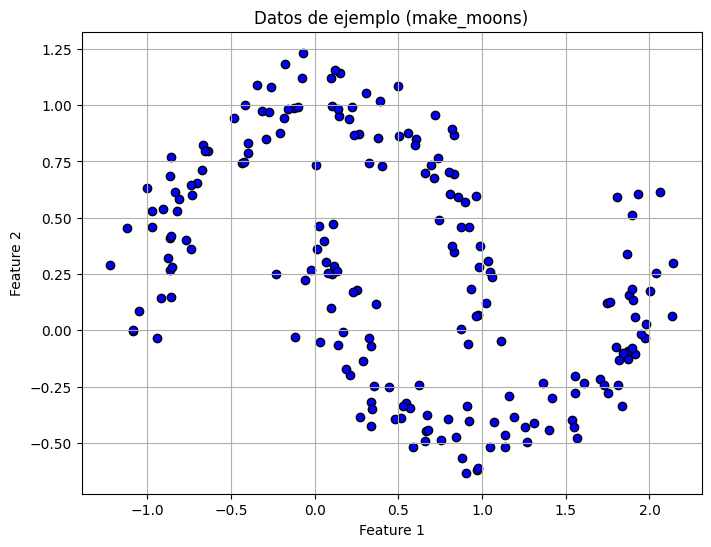

In [9]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generar datos de ejemplo (dos semicírculos)
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)


# Visualizar los datos de ejemplo
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolors='black')
plt.title('Datos de ejemplo (make_moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


Donde: 

- `make_moons`: Esta función genera un conjunto de datos sintético con dos semicírculos intercalados.

- `n_samples`: Especifica el número de puntos de datos que se generarán.

- `noise`: Controla la desviación estándar del ruido añadido a los datos.

- `random_state`: Semilla aleatoria para reproducibilidad.

- `X`: Es la matriz de características que contiene las coordenadas de los puntos generados.

- `_`: Ignoramos la segunda salida, ya que en este caso no la necesitamos.


Una vez generados los puntos procedemos a la inicialización de DBSCAN:

In [10]:
from sklearn.cluster import DBSCAN

# Inicializar DBSCAN con los parámetros eps y min_samples
dbscan = DBSCAN(eps=0.2, min_samples=5)

Proceso de agrupamiento:

In [11]:
# Aplicar DBSCAN a los datos de ejemplo
dbscan.fit(X)

# Obtener las etiquetas de los clusters asignadas por DBSCAN
labels = dbscan.labels_


Aqui:

- `dbscan.fit(X)`: Utilizamos el método fit del objeto DBSCAN previamente inicializado para ajustar el modelo a los datos de entrada X. Esto significa que DBSCAN buscará y asignará clusters a los puntos en base a la densidad de los datos.

- `labels` = dbscan.labels_: Después de ajustar el modelo, obtenemos las etiquetas de los clusters asignadas por DBSCAN utilizando el atributo labels_ del objeto DBSCAN. Estas etiquetas representan a qué cluster pertenece cada punto de datos. Los puntos que no pertenecen a ningún cluster se etiquetarán como ruido y tendrán la etiqueta -1.

Y por ultimo, realizamos la visualización de los resultados:

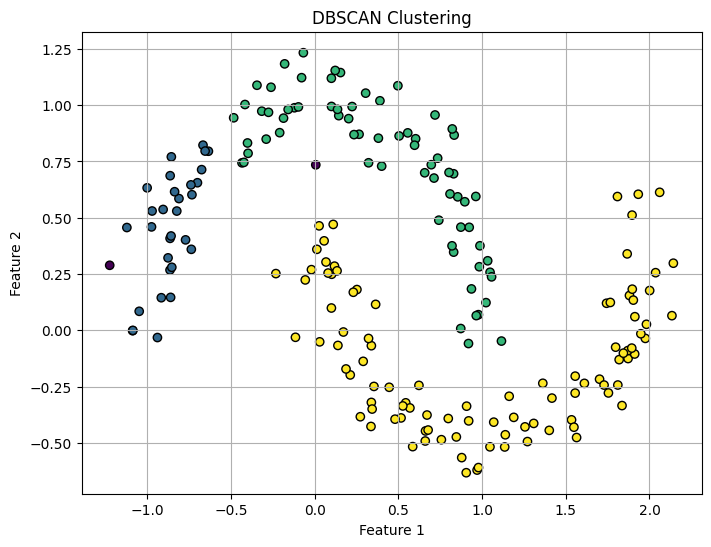

In [12]:
# Visualizar los resultados de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


Este ejemplo práctico muestra cómo utilizar DBSCAN para agrupar datos de ejemplo generados con la función make_moons. El algoritmo asigna etiquetas a cada punto en función de su pertenencia a un cluster o si se considera ruido. La visualización final muestra los puntos coloreados según las etiquetas asignadas por DBSCAN.

## Ejemplo 2

Generaremos un conjunto de datos sintético que contenga clusters de diferentes formas y densidades. Luego aplicaremos el algoritmo DBSCAN para agrupar estos datos y visualizaremos los resultados para comprender cómo DBSCAN puede manejar clusters de diferentes formas y tamaños.


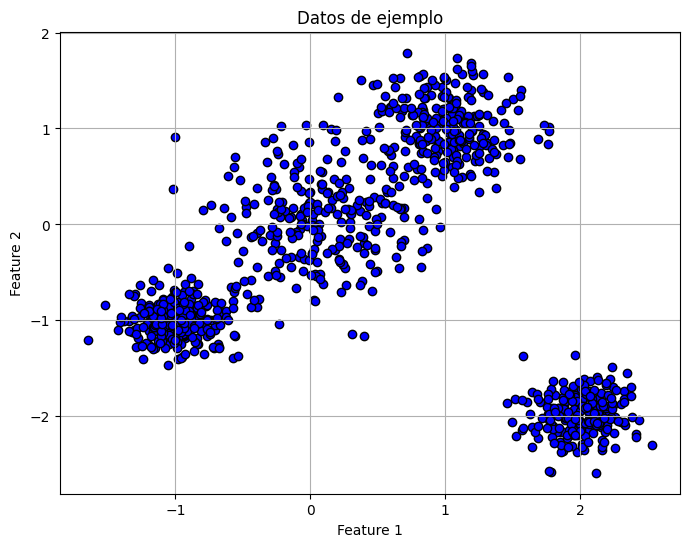

In [1]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generar datos de ejemplo (clusters con diferentes densidades y formas)
X, _ = make_blobs(n_samples=1000, centers=[[-1, -1], [1, 1], [0, 0], [2, -2]], cluster_std=[0.2, 0.3, 0.4, 0.2], random_state=42)

# Visualizar los datos de ejemplo
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolors='black')
plt.title('Datos de ejemplo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


En este ejemplo, utilizamos la función make_blobs de scikit-learn para generar un conjunto de datos sintético que contiene cuatro clusters con diferentes densidades y formas. Ahora aplicaremos DBSCAN a estos datos y visualizaremos los resultados.

Ya tenemos entonces nuestros datos con los cuales vamos a trabajar. Ahora definamos algunos parámetros:

In [2]:
# Definir los parámetros del algoritmo DBSCAN
eps = 0.3
min_samples = 10


Definimos los parámetros del algoritmo DBSCAN. El parámetro eps especifica la distancia máxima entre dos puntos para que se consideren vecinos, y el parámetro min_samples especifica el número mínimo de puntos requeridos para formar un cluster. Estos parámetros son críticos para el funcionamiento del algoritmo y deben ajustarse según la naturaleza de los datos.

In [3]:
# Inicializar DBSCAN con los parámetros definidos
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Aplicar DBSCAN a los datos de ejemplo
dbscan.fit(X)

# Obtener las etiquetas de los clusters asignadas por DBSCAN
labels = dbscan.labels_


Inicializamos el objeto DBSCAN con los parámetros definidos y luego aplicamos el algoritmo a los datos de ejemplo utilizando el método fit. DBSCAN identificará clusters automáticamente basándose en la densidad de los puntos en el espacio de características. Las etiquetas de los clusters asignadas por DBSCAN se almacenan en la variable labels.

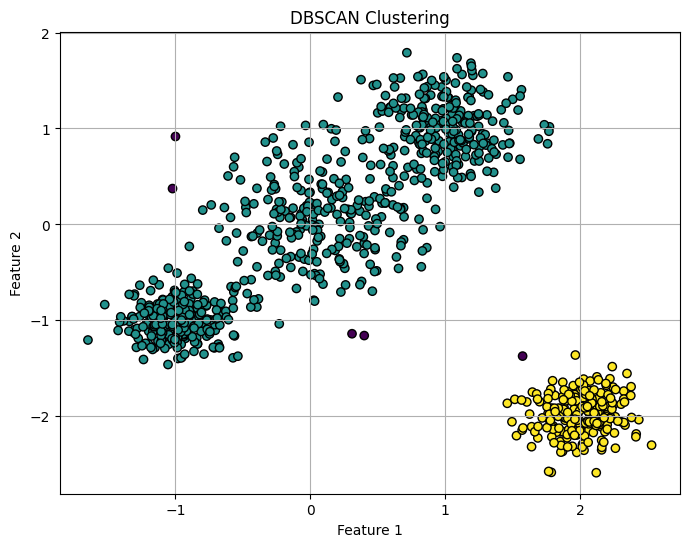

In [4]:
# Visualizar los resultados de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


Este segundo ejemplo implementa el algoritmo DBSCAN en Python utilizando scikit-learn y lo aplica a un conjunto de datos sintético generado con la función make_blobs. La visualización final muestra los puntos coloreados según las etiquetas asignadas por DBSCAN, lo que nos permite ver cómo DBSCAN puede manejar clusters de diferentes formas y tamaños.

## Ejemplo 3

#### Generación de datos 
Importamos las funciones necesarias de scikit-learn: make_blobs para generar datos sintéticos y StandardScaler para estandarizar (escalar) los datos. En este caso se crearan 3 grupos sintéticos.

In [5]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

Para comprender mejor las funciones:

- `centers`: Es una lista de las coordenadas de los centros de los clusters. En este caso, hay tres clusters con centros en (1, 1), (-1, -1) y (1, -1).

- `n_samples`: Especifica el número de muestras que se generarán en total.

- `cluster_std`: Especifica la desviación estándar de cada cluster.

- `random_state`: Semilla aleatoria para reproducibilidad.

- `X`: Contiene las coordenadas de las muestras generadas.

- `labels_true`: Contiene las etiquetas verdaderas de los clusters a los que pertenecen las muestras.


Aquí, los datos X se escalan utilizando StandardScaler. Este proceso estandariza las características eliminando la media y escalando a la varianza unitaria. Es una práctica común en muchos algoritmos de aprendizaje automático para garantizar que todas las características tengan el mismo peso.

Ahora podemos visualizar los datos resultantes:

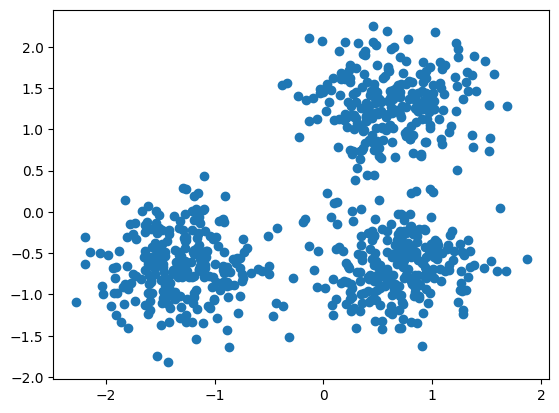

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Para ello importamos la biblioteca matplotlib.pyplot que nos permitirá crear visualizaciones de nuestros datos. De ahi que utilizamos la función scatter de para crear un diagrama de dispersión de nuestros datos. 

X[:, 0] y X[:, 1] representan las coordenadas de las características escaladas. La primera columna de X representa la primera característica y la segunda columna representa la segunda característica.

Finalmente, llamamos a plt.show() para mostrar la visualización del diagrama de dispersión de los datos. Esto abrirá una ventana emergente con la visualización del gráfico.

#### Calcular DBSCAN

Se puede acceder a las etiquetas asignadas utilizando DBSCAN el labels_atributo. Las muestras ruidosas reciben la etiqueta matemática: -1.

In [8]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número estimado de agrupaciones: %d" % n_clusters_)
print("Número estimado de puntos de ruido: %d" % n_noise_)

Número estimado de agrupaciones: 3
Número estimado de puntos de ruido: 18


Los algoritmos de agrupamiento son fundamentalmente métodos de aprendizaje no supervisados. Sin embargo, dado que make_blobs brinda acceso a las etiquetas verdaderas de los grupos sintéticos, es posible utilizar métricas de evaluación que aprovechen esta información de verdad "supervisada" sobre el terreno para cuantificar la calidad de los grupos resultantes. Ejemplos de tales métricas son la homogeneidad, la integridad, la medida V, el índice Rand, el índice Rand ajustado y la información mutua ajustada (AMI).

Si no se conocen las etiquetas de verdad del terreno, la evaluación solo se puede realizar utilizando los resultados del modelo en sí. En ese caso, el Coeficiente de Silueta resulta útil.

Si nos adentramos un poco en el codigo:

- Creamos un objeto DBSCAN con un radio de vecindad (`eps`) de 0.3 y un número mínimo de muestras (`min_samples`) de 10. Luego ajustamos este modelo a nuestros datos X usando el método fit.

- Obtenemos las etiquetas de los clusters asignadas por DBSCAN usando el atributo `labels_`.

- Calculamos el número estimado de clusters `n_clusters` y el número estimado de puntos de ruido `n_noise` (puntos que no pertenecen a ningún cluster) en los datos. Restamos 1 al número total de etiquetas si -1 (etiqueta para puntos de ruido) está presente en las etiquetas.

Finalmente, imprimimos el número estimado de clusters y el número estimado de puntos de ruido en los datos. Estos valores nos proporcionan información sobre la estructura de los datos y la efectividad del algoritmo de agrupamiento en encontrar clusters significativos. Y proseguimos con hallar las métricas que proporcionan información valiosa sobre la calidad del clustering producido por DBSCAN y nos ayudan a evaluar su desempeño en comparación con las etiquetas verdaderas

In [9]:
print(f"Homogeneidad: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Integridad: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"Medida V: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Índice Rand ajustado: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Información mutua ajustada:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Coeficiente de silueta: {metrics.silhouette_score(X, labels):.3f}")

Homogeneidad: 0.953
Integridad: 0.883
Medida V: 0.917
Índice Rand ajustado: 0.952
Información mutua ajustada: 0.916
Coeficiente de silueta: 0.626


- La homogeneidad mide la similitud de los clusters en un conjunto de datos respecto a una etiqueta verdadera. Un valor de homogeneidad cercano a 1 indica que cada cluster contiene solo puntos de una única clase.

- La integridad mide la similitud de una clase en un conjunto de datos con respecto a un cluster. Un valor de integridad cercano a 1 indica que todos los puntos de una clase dada están asignados al mismo cluster.

- La medida V es la media armónica entre homogeneidad e integridad. Proporciona una medida global de la calidad del clustering.

- El índice Rand ajustado es una métrica que compara las agrupaciones obtenidas con las etiquetas verdaderas, ajustando por el azar. Toma un valor entre -1 y 1, donde 1 indica una correspondencia perfecta entre las agrupaciones y las etiquetas verdaderas.

- La información mutua ajustada mide la similitud entre dos agrupaciones, ajustando por el azar. Toma un valor entre 0 y 1, donde 1 indica una similitud perfecta entre las agrupaciones.

- El coeficiente de silueta es una medida de la cohesión y separación de los clusters. Toma valores entre -1 y 1, donde valores más altos indican clusters mejor definidos y más separados.

#### Trazar resultados 

Las muestras centrales (puntos grandes) y las muestras no centrales (puntos pequeños) están codificadas por colores según el grupo asignado. Las muestras etiquetadas como ruido se representan en negro.

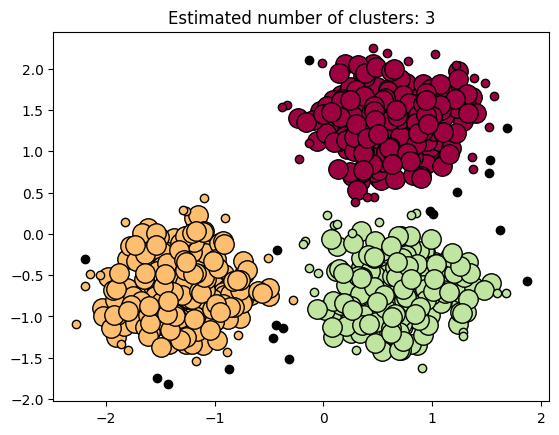

In [10]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Número estimado de agrupaciones: {n_clusters_}")
plt.show()

Este bloque de código es responsable de visualizar los resultados del clustering DBSCAN y destacar los puntos centrales y los puntos de borde.

- `unique_labels`: Calcula el conjunto único de etiquetas de clusters.

- `core_samples_mask`: Crea una máscara booleana para marcar los puntos centrales.

- `colors`: es una lista de colores para cada cluster, utilizando una interpolación en el mapa de colores "Spectral" de matplotlib.

Ciclo For:

- Itera sobre cada etiqueta de cluster y sus colores correspondientes.

- Dibuja los puntos centrales con un tamaño de marcador mayor (14) y los puntos de borde con un tamaño de marcador menor (6).

Por ultimo, se establece el título del gráfico para mostrar el número estimado de clusters y se muestra el gráfico que representa los puntos clasificados por el algoritmo DBSCAN, donde los puntos centrales tienen un tamaño de marcador mayor y los puntos de borde tienen un tamaño de marcador menor. Los puntos de ruido se representan en negro.

#### Finalmente

Después de aplicar DBSCAN, hemos visualizado los resultados para comprender cómo se han agrupado los puntos en el espacio. Los puntos se han coloreado según el cluster al que han sido asignados, y los puntos centrales de cada cluster se han representado con un tamaño de marcador mayor, mientras que los puntos de borde se han representado con un tamaño de marcador menor. Los puntos que no pertenecen a ningún cluster (ruido) se han representado en negro.

Esta visualización nos proporciona información sobre la estructura de los datos y cómo DBSCAN ha interpretado esa estructura. Nos permite identificar clusters significativos en los datos, así como puntos que pueden considerarse ruido o puntos atípicos. La cantidad de clusters identificados y la distribución de los puntos nos ayudan a comprender la complejidad y la naturaleza de los datos.

## Actividad

#### Problema: Segmentación de Clientes de un Centro Comercial

Un centro comercial desea comprender mejor el comportamiento de sus clientes para mejorar sus estrategias de marketing y servicios personalizados. Para ello, recopilaron datos sobre las compras de los clientes en varias tiendas del centro comercial. Cada fila en el conjunto de datos representa a un cliente y contiene información sobre el gasto total, la frecuencia de compra y la cantidad de productos comprados.

#### Desarrollo del Problema:

- Generación de Datos: Diseñaremos un conjunto de datos sintéticos que simule el comportamiento de compra de los clientes. Esto incluirá variables como el gasto total, la frecuencia de compra y la cantidad de productos comprados.

- Clustering con DBSCAN: Utilizaremos el algoritmo DBSCAN para segmentar a los clientes en grupos basados en sus patrones de compra. Esto nos ayudará a identificar diferentes tipos de clientes y sus características.

- Análisis de Resultados: Analizaremos los clusters obtenidos para comprender las características de cada grupo de clientes. Esto incluirá visualizaciones y métricas de evaluación del clustering.


#### Generaremos un conjunto de datos sintéticos con las siguientes características:

- Gasto Total: Monto total gastado por el cliente en el centro comercial.
- Frecuencia de Compra: Número de veces que el cliente realiza compras en el centro comercial en un período de tiempo determinado.
- Cantidad de Productos Comprados: Número total de productos comprados por el cliente en todas sus compras.

In [2]:
# Importar librerías necesarias
import numpy as np
import pandas as pd

# Configuración de la semilla aleatoria para reproducibilidad
np.random.seed(42)

# Generación de datos sintéticos
n_samples = 500
total_spending = np.random.normal(loc=100, scale=30, size=n_samples)
purchase_frequency = np.random.randint(1, 10, size=n_samples)
products_purchased = np.random.randint(1, 20, size=n_samples)

# Crear DataFrame
data = pd.DataFrame({
    'Total Gasto': total_spending,
    'Frecuencia de Compra': purchase_frequency,
    'Cantidad de Productos Comprados': products_purchased
})

# Visualizar los primeros registros del DataFrame
print(data.head())


   Total Gasto  Frecuencia de Compra  Cantidad de Productos Comprados
0   114.901425                     2                                5
1    95.852071                     8                               11
2   119.430656                     6                                6
3   145.690896                     5                                7
4    92.975399                     9                               14


Este código generará un DataFrame con datos sintéticos que simulan el comportamiento de compra de los clientes en el centro comercial.


#### Preguntas a Desarrollar:

- ¿Cuántos clusters distintos de clientes se identificaron utilizando DBSCAN?
- ¿Cuál es el tamaño de cada cluster? (Número de clientes en cada grupo)
- ¿Cuáles son las características promedio de cada cluster en términos de gasto total, frecuencia de compra y cantidad de productos comprados?
- ¿Qué cluster tiene el mayor gasto total promedio?
- ¿Qué cluster tiene la mayor frecuencia de compra promedio?
- ¿Qué cluster tiene la mayor cantidad de productos comprados promedio?
- ¿Cuál es el coeficiente de silueta del clustering?
- ¿Hay algún cluster que se pueda considerar como "cliente frecuente" en términos de frecuencia de compra y cantidad de productos comprados?
- ¿Cuál es el porcentaje de clientes que se clasificaron como ruido por DBSCAN?
- ¿Cómo se distribuyen los clientes ruidosos en términos de sus características de compra?


## Solución

In [3]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Preprocesamiento de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Responder las preguntas
# 1. ¿Cuántos clusters distintos de clientes se identificaron utilizando DBSCAN?
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("1. Número de clusters identificados:", n_clusters)

# 2. ¿Cuál es el tamaño de cada cluster?
cluster_sizes = pd.Series(labels).value_counts()
print("\n2. Tamaño de cada cluster:")
print(cluster_sizes)

# 3. ¿Cuáles son las características promedio de cada cluster?
cluster_means = data.groupby(labels).mean()
print("\n3. Características promedio de cada cluster:")
print(cluster_means)

# 4. ¿Qué cluster tiene el mayor gasto total promedio?
max_spending_cluster = cluster_means['Total Gasto'].idxmax()
print("\n4. Cluster con el mayor gasto total promedio:", max_spending_cluster)

# 5. ¿Qué cluster tiene la mayor frecuencia de compra promedio?
max_frequency_cluster = cluster_means['Frecuencia de Compra'].idxmax()
print("\n5. Cluster con la mayor frecuencia de compra promedio:", max_frequency_cluster)

# 6. ¿Qué cluster tiene la mayor cantidad de productos comprados promedio?
max_products_cluster = cluster_means['Cantidad de Productos Comprados'].idxmax()
print("\n6. Cluster con la mayor cantidad de productos comprados promedio:", max_products_cluster)

# 7. ¿Cuál es el coeficiente de silueta del clustering?
silhouette_score = metrics.silhouette_score(X_scaled, labels)
print("\n7. Coeficiente de silueta del clustering:", silhouette_score)

# 8. ¿Hay algún cluster que se pueda considerar como "cliente frecuente" en términos de frecuencia de compra y cantidad de productos comprados?
frequent_customer_cluster = cluster_means[(cluster_means['Frecuencia de Compra'] > cluster_means['Frecuencia de Compra'].mean()) &
                                          (cluster_means['Cantidad de Productos Comprados'] > cluster_means['Cantidad de Productos Comprados'].mean())].index.tolist()
print("\n8. Cluster considerado como 'cliente frecuente':", frequent_customer_cluster)

# 9. ¿Cuál es el porcentaje de clientes que se clasificaron como ruido por DBSCAN?
noise_percentage = (labels == -1).mean() * 100
print("\n9. Porcentaje de clientes clasificados como ruido:", noise_percentage)

# 10. ¿Cómo se distribuyen los clientes ruidosos en términos de sus características de compra?
noise_data = data[labels == -1]
print("\n10. Distribución de clientes ruidosos en términos de características de compra:")
print(noise_data.describe())


1. Número de clusters identificados: 2

2. Tamaño de cada cluster:
 0    433
-1     61
 1      6
Name: count, dtype: int64

3. Características promedio de cada cluster:
    Total Gasto  Frecuencia de Compra  Cantidad de Productos Comprados
-1   101.658333              4.622951                         8.754098
 0    99.386848              5.011547                        10.175520
 1   144.484394              5.333333                         7.166667

4. Cluster con el mayor gasto total promedio: 1

5. Cluster con la mayor frecuencia de compra promedio: 1

6. Cluster con la mayor cantidad de productos comprados promedio: 0

7. Coeficiente de silueta del clustering: -0.02656045582114924

8. Cluster considerado como 'cliente frecuente': [0]

9. Porcentaje de clientes clasificados como ruido: 12.2

10. Distribución de clientes ruidosos en términos de características de compra:
       Total Gasto  Frecuencia de Compra  Cantidad de Productos Comprados
count    61.000000             61.000000 